In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
wine = datasets.load_wine()
X, y = wine.data, wine.target

In [11]:
class LDA:
    
     
    def fit(self, X, y):
        
        self.N, self.D = X.shape
        self.X = X
        self.y = y
         
        self.unique_y, unique_y_counts = np.unique(self.y, return_counts = True) # returns unique y and counts
        self.pi_ks = unique_y_counts/self.N
        
        self.mu_ks = []
        self.Sigma = np.zeros((self.D, self.D))        
        for i, k in enumerate(self.unique_y):
            
            X_k = self.X[self.y == k]
            mu_k = X_k.mean(0).reshape(self.D, 1)
            self.mu_ks.append(mu_k)

            for x_n in X_k:
                x_n = x_n.reshape(-1,1)
                x_n_minus_mu_k = (x_n - mu_k)
                self.Sigma += np.dot(x_n_minus_mu_k, x_n_minus_mu_k.T)
            
        self.Sigma /= self.N
        
        
    def _mvn_density(self, x_n, mu_k, Sigma):
        x_n_minus_mu_k = (x_n - mu_k)
        density = np.exp(-(1/2)*x_n_minus_mu_k.T @ np.linalg.inv(Sigma) @ x_n_minus_mu_k)
        return density
            
    def classify(self, X_test):
        
        y_n = np.empty(len(X_test))
        for i, x_n in enumerate(X_test):
            
            x_n = x_n.reshape(-1, 1)
            p_ks = np.empty(len(self.unique_y))
        
            for j, k in enumerate(self.unique_y):
                p_x_given_y = self._mvn_density(x_n, self.mu_ks[j], self.Sigma)
                p_y_given_x = self.pi_ks[j]*p_x_given_y
                p_ks[j] = p_y_given_x
            
            y_n[i] = self.unique_y[np.argmax(p_ks)]
        
        return y_n

In [15]:
lda = LDA()
lda.fit(X, y)
yhat = lda.classify(X)
np.mean(yhat == y)

1.0

In [17]:
def graph_boundaries(X, model, model_title, n0 = 100, n1 = 100, figsize = (7, 5), label_every = 4):
        
        d0_range = np.linspace(X[:,0].min(), X[:,0].max(), n0)
        d1_range = np.linspace(X[:,1].min(), X[:,1].max(), n1)
        X_plot = np.array(np.meshgrid(d0_range, d1_range)).T.reshape(-1, 2)
        
        y_plot = model.classify(X_plot).astype(int)
        
        fig, ax = plt.subplots(figsize = figsize)
        sns.heatmap(y_plot.reshape(n0, n1).T,
                   cmap = sns.color_palette('Pastel1', 3),
                   cbar_kws = {'ticks':sorted(np.unique(y_plot))})
        xticks, yticks = ax.get_xticks(), ax.get_yticks()
        ax.set(xticks = xticks[::label_every], xticklabels = d0_range.round(2)[::label_every],
               yticks = yticks[::label_every], yticklabels = d1_range.round(2)[::label_every])
        ax.set(xlabel = 'X1', ylabel = 'X2', title = model_title + ' Predictions by X1 and X2')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

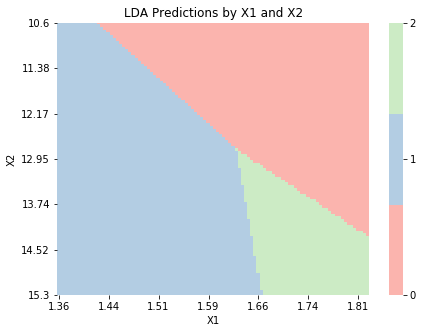

In [18]:
X_2d = X.copy()[:,2:4]
lda_2d = LDA()
lda_2d.fit(X_2d, y)
graph_boundaries(X_2d, lda_2d, 'LDA')